# Differential expression analysis


You have now successfully run the pipeline and checked the first quality control metrics of your fastq files. However, this is only primary analysis.

We would now like to understand exactly the difference between our groups of mice. 

Which pipeline would you use for this?


I would use the the nf-core/differentialabundance pipeline. 

Please paste here the command you used

In [34]:
import pandas as pd

samplesheet_daa = pd.DataFrame(columns=['sample','condition'])

samplesheet_daa['sample'] = ['Sham_oxy_1', 'Sham_oxy_2', 'Sham_oxy_3', 'Sham_oxy_4', 'Sham_Sal_1', 'Sham_Sal_2', 'Sham_Sal_3', 'Sham_Sal_4', 'SNI_oxy_1', 'SNI_oxy_2', 'SNI_oxy_3', 'SNI_oxy_4', 'SNI_Sal_1', 'SNI_Sal_2', 'SNI_Sal_3', 'SNI_Sal_4']
samplesheet_daa['condition'] = ['Sham_treated','Sham_treated','Sham_treated','Sham_treated','Sham_control','Sham_control','Sham_control','Sham_control','SNI_treated','SNI_treated','SNI_treated','SNI_treated','SNI_control','SNI_control','SNI_control','SNI_control']
#samplesheet_daa['genotype'] = ['Sham','Sham','Sham','Sham','Sham','Sham','Sham','Sham','SNI','SNI','SNI','SNI','SNI','SNI','SNI','SNI']
samplesheet_daa.to_csv('samplesheet_daa.csv', index=False) 

In [35]:
contrast_df =  pd.DataFrame(columns=['id','variable','reference','target'])
contrast_df['id'] = ['condition_SNIoxy_Shamsal','condition_Shamoxy_Shamsal','condition_SNIsal_Shamoxy']
contrast_df['variable'] = ['condition','condition','condition']
contrast_df['reference'] = ['Sham_control','Sham_control','Sham_control']
contrast_df['target'] = ['SNI_treated','Sham_treated','SNI_control']

contrast_df.to_csv('contrast_daa.csv', index=False)

In [36]:
!NXF_VER=23.10.1 nextflow run nf-core/differentialabundance --input samplesheet_daa.csv --outdir DAY3_1 --matrix 'salmon.merged.gene_counts.tsv' --contrasts contrast_daa.csv -profile rnaseq,docker -resume --max_cpus 4 --max_memory '7GB'

Nextflow 24.04.4 is available - Please consider updating your version to it
N E X T F L O W  ~  version 23.10.1
Launching `https://github.com/nf-core/differentialabundance` [lethal_celsius] DSL2 - revision: 3dd360fed0 [master]
WARN: Access to undefined parameter `monochromeLogs` -- Initialise it to a default value eg. `params.monochromeLogs = some_value`


------------------------------------------------------
                                        ,--./,-.
        ___     __   __   __   ___     /,-._.--~'
  |\ | |__  __ /  ` /  \ |__) |__         }  {
  | \| |       \__, \__/ |  \ |___     \`-._,-`-,
                                        `._,._,'
  nf-core/differentialabundance v1.5.0-g3dd360f
------------------------------------------------------
Core Nextflow options
  revision                    : master
  runName                     : lethal_celsius
  containerEngine             : docker
  container                   : [RMARKDOWNNOTEBOOK:biocontainers/r-shinyngs:1.8.8--r43hdfd7

Explain all the parameters you set and why you set them in this way.


- *--input*: defines the used samplesheet
- *--contrast*: defines the used contrast file, that defines which conditions and genotypes get compared to each other
- *--max_cpus*: specifies the maximum number of CPUs the pipeline gets
- *--max_memory*: specifies the maximal amount of memory the pipeline gets


How did the pipeline perform?

The pipeline took 7.19 minutes and 0.1 CPU hours to complete. MAKE_REPORT_BUNDLE had the highest percentage of CPU usage. RMARKDOWNNOTEBOOK had the highest median memory usage with around 3GB. It also had the longest execution time with around 1 minute.

Would you exclude any samples? If yes, which and why?

Eventhough the outlier detection did not find any outliers I would exclued the samples SNI_Sal_4 and SNI_Sal_2. These samples are both very far off in the PCA plot and the quality of these samples in the quality control steps was very poor. In the clustering dendograms these two samples also have a great distance to the other samples.

How many genes were differentially expressed in each contrast? Does this confirm what the paper mentions?

In the SNI_oxy versus Sham_sal contrast one gene was upregulated and one gene was downregulated. <br>
In the Sham_oxy versus Sham_sal contrast eight genes were upregulated.<br>
In the SNI_sal versus Sham_sal contrast 72 genes were upregulated and one was down regulated.<br>

These numbers are a lot smaller than the number of differentially expressed genes mentioned in the paper. 
In the paper the following number of DEGs are mentioned:
- SNI_oxy versus Sham_sal:
    - NAc: &emsp; 1,012
    - mPFC: &nbsp; 1,116
    - VTA:  &emsp;&nbsp; 533

- Sham_oxy versus Sham_sal:
    - NAc: &emsp; 2,609
    - mPFC: &nbsp; 1,449 
    - VTA:  &emsp;&nbsp; 584

- SNI_sal versus Sham_sal:
    - NAc: &emsp; 1,457
    - mPFC: &ensp;1,052
    - VTA:  &emsp;&nbsp; 425


The paper mentions differentially expressed genes in three brain regions : the NAc, mPFC and VTA. Briefly explain what these 3 regions are.

- NAc: The nucleus accumbens is a part of the ventral striatum, plays a role in different behaviors and is connected to some diseases[1].
- mPFC: The medial prefrontal cortex takes part in many brain functions. The most abundant cell type of the mPDC are excitatory pyramidal neurons. It is also connected to some diseases[2].
- VTA: The ventral tegmental area plays a role in many behaviors[3]. The most abundant cell type in the VTA are dopaminergic neurons. With these the VTA can release dopamine.  

They are all part of the brain reward circuit[4].

[1] Salgado, Sanjay, and Michael G. Kaplitt. "The nucleus accumbens: a comprehensive review." Stereotactic and functional neurosurgery 93.2 (2015): 75-93<br>
[2] Xu, Pan, et al. "Medial prefrontal cortex in neurological diseases." Physiological genomics 51.9 (2019): 432-442.<br>
[3] Cai, Jing, and Qingchun Tong. "Anatomy and function of ventral tegmental area glutamate neurons." Frontiers in neural circuits 16 (2022): 867053<br>
[4] Pryce, Kerri D., et al. "Oxycodone withdrawal induces HDAC1/HDAC2-dependent transcriptional maladaptations in the reward pathway in a mouse model of peripheral nerve injury." Nature neuroscience 26.7 (2023): 1229-1244

Is there anyway from the paper and the material and methods for us to know which genes are included in these regions?

Yes, in table one different pathways and their regions in the brain are listed. For each pathway and brain region the differential expressed genes are given.

Once you have your list of differentially expressed genes, do you think just communicating those to the biologists would be sufficient? What does the publication state?

No the list of differential expressed genes is not sufficient. In the paper they also performed pathway analysis. That revealed that a top upstream regulator in the mPFC and NAc is  histone deacetylase. Thus they identified that inhibiting histone deacetylase 1 can help patients depending on oxycodeone to switch to non-opioids.

Please reproduce the Venn Diagram from Figure 3, not taking into account the brain regions but just the contrasts mentioned.


DEGS

|-|SNI_treated versus Sham_control | SNI_control versus Sham_control | Sham_treated verus Sham_control| both|
| --- | --- | --- | --- | --- |
| SNI_treated versus Sham_control | 1 | --- | --- | 1 |
| SNI_control versus Sham_control | --- | 70 | 1 | 1 |
| Sham_treated verus Sham_control | --- | 1 | 6 | 1 |

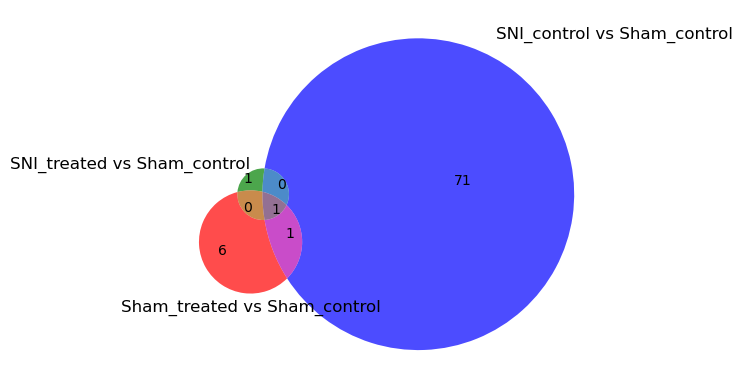

In [1]:
from matplotlib_venn import venn3  
from matplotlib import pyplot as plt 
venn3(subsets=(1, 71, 0, 6, 0, 1, 1),  
      set_labels=('SNI_treated vs Sham_control', 'SNI_control vs Sham_control', 'Sham_treated vs Sham_control'),  
      set_colors=("green", "blue", "red"), alpha=0.7) 